# 5. Estatística

* A estatística se refere à matemática e às técnicas com as quais entendemos os dados.

### Descrevendo um Conjunto Único de Dados

* Uma descrição evidente de qualquer dado é simplesmente o dado em si
  * Em um conjunto pequeno de dados, pode ser a melhor representação.
  * Para grandes conjuntos de dados, é uma visualização complicada e confusa.


* Uma melhor forma para descrever esses dados é a utilização da estatística

In [1]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,
               15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,
               10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,
               9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,
               8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,
               6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,
               5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
               4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
               3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,
               1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [14]:
# Funções auxiliares

# Soma entre dois vetores:
def vector_add(v,w):
    return [v_i + w_i
           for v_i, w_i in zip(v,w)]

# Subtração entre dois vetores:
def vector_subtract(v,w):
    return [v_i - w_i
           for v_i, w_i in zip(v,w)]

# Somatório de uma lista de vetores
def vector_sum(vectors):
    return reduce(vector_add, vectors)

# Multiplicação de vetor por escalar
def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

# Média de uma lista de vetores
def vector_mean(vectors):
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

# Produto escalar. Somatório dos produtos componente a componente
def dot(v, w):
    return sum(v_i * w_i
           for v_i, w_i in zip(v,w))

# Somatório dos quadrados do vetor
def sum_of_squares(v):
    return dot(v,v)

# Magnitude (ou tamanho)
import math
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

# Distância entre dois vetores
def distance(v,w):
    return magnitude(vector_subtract(v,w))

* Iniciamos com a contagem dos amigos usando Counter e gerando um histograma: 

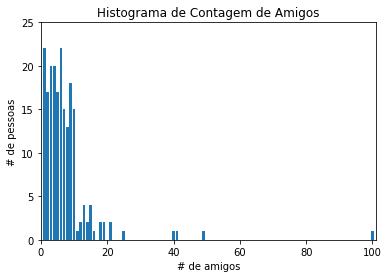

In [2]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs,ys)
plt.axis([0,101,0,25])
plt.title("Histograma de Contagem de Amigos")
plt.xlabel("# de amigos")
plt.ylabel("# de pessoas")

plt.show()

* O gráfico gerado ainda é confuso. 
* Para melhorar a interpretação dos dados, serão geradas algumas estatísticas.

In [3]:
# Número de pontos nos dados
num_points = len(num_friends)
print("Número de pontos de dados: ", num_points)

# Maior e menor valor
largest_value = max(num_friends)
smallest_value = min(num_friends)
print("Maior valor: ", largest_value, "\nMenor valor: ", smallest_value)

# Valores em posições específicas
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0] # 1
second_smallest_value = sorted_values[1] # 1
second_largest_value = sorted_values[-2] # 49
print("Segundo maior valor: {}".format(second_largest_value))
print("Segundo menor valor: {}".format(second_smallest_value))

Número de pontos de dados:  204
Maior valor:  100 
Menor valor:  1
Segundo maior valor: 49
Segundo menor valor: 1


### Tendências Centrais

* Queremos ter alguma noção de onde os nossos dados estão centrados.

* Média
  * Soma dos dados divididos pela sua contagem
  * Com dois pontos de dados, a média é o meio do caminho entre eles. 
  * Além da quantidade dos dados, também depende do valor.
  * Mais fácil de computar.
  * Varia de modo mais suave conforme os dados mudam.
  

In [4]:
def mean(x):
    return sum(x)/len(x)

mean(num_friends)

7.333333333333333

* Mediana
  * Valor maior do meio (quantidade impar de dados) ou a média dos dois valores do meio (par).
  * Não depende de cada valor dos dados

In [5]:
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n//2
    
    if n%2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint-1
        hi = midpoint
        return (sorted_v[lo]+sorted_v[hi])/2
    
median(num_friends)

6.0

* A média é muito sensível a valores discrepantes nos dados.
* Se esses valores discrepantes tem a possibilidade de ser valores ruins, então a média pode levar a um engano.
* Uma generalização da média é o quantil:
  * Representa o valor abaixo do qual a uma porcentagem dos dados se encontra.
  * A mediana é o valor abaixo do qual se encontram 50% dos dados.

In [6]:
def quantile(x,p):
    p_index = int(p*len(x))
    return sorted(x)[p_index]

In [7]:
quantile(num_friends, 0.10)

1

In [8]:
quantile(num_friends, 0.25)

3

In [9]:
quantile(num_friends, 0.75)

9

In [10]:
quantile(num_friends, 0.90)

13

* Moda
  * Valores mais comuns


In [11]:
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
           if count == max_count]

In [12]:
mode(num_friends)

[6, 1]

### Dispersão

* Refere-se a medida de como os dados estão espalhados.
* Valores mais próxmis de zero, os dados não estão tão espalhado e valores maiores indicam que estão muito espalhados.
* Amplitude
  * Diferença entre o maior e o menor elemento.
  * É zero quando o max e o min são iguais. Significa que os dados estão o menos dispersos possível.
  * Se a amplitude é um valor muito alto, o max é bem maior que o min e significa que os dado estão mais espalhados.
  * Não depende de todo o conjunto de dados.

In [13]:
# Amplitude
def data_range(x):
    return max(x)-min(x)

data_range(num_friends)

99

* Variância
  * Um pouco mais complexa que a amplitude.
  * Indica quanto uma variável desvia de sua média.
  * Possui unidades ao quadrado, ou seja, outras medidas de dispersão possuem a mesma unidade, a variância possui essas unidade ao quadrado.

In [15]:
# Cálculo dos desvios
def de_mean(x):
    x_bar = mean(x)
    return [x_i -x_bar for x_i in x]

# Cálculo da variância
def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations)/(n-1)

variance(num_friends)

81.54351395730716

* Desvio Padrão

In [16]:
# Cálculo do desvio padrão
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.03014473623248

* Diferença interquartil
  * Computa a diferença entre os percentos 75 e 25%.
  * Não é afetado por uma pequena quantidade de valores discrepantes.

In [17]:
# Cálculo da diferença interquartil
def interquartile_range(x):
    return quantile(x, 0.75)-quantile(x, 0.25)

interquartile_range(num_friends)

6

### Correlação

A vice-presidente de Crescimento na DataSciencester tem uma teoria que a quantidade de tempo gasto pelas pessoas no site é relacionada ao número de amigos que elas possuem (ela não é uma vice presidente à toa), e ela pediu para você verificar isso.

Após examinar os registros do tráfego, você desenvolve uma lista daily_minutes que mostra quantos minutos por dia cada usuário passa na DataSciencester e você havia ordenado essa lista para que seus elementos correspondessem aos elementos da lista anterior num_ friends . Gostaríamos de investigar a relação entre essas duas métricas.


In [18]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,
                 41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,
                 41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,
                 26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,
                 21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,
                 27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,
                 23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,
                 38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,
                 37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,
                 17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,
                 31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,
                 35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,
                 14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,
                 21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,
                 33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,
                 26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,
                 35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,
                 24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,
                 32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,
                 18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,
                 16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,
                 14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,
                 21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]


* A correlação trata da relação entre duas variáveis.
* Covariância
  * Verifica como duas variáveis variam em conjunto de suas médias.
  * Se os elementos correspondentes de x e y estão acima ou abaixo da média, o valor que entra na soma é positiva.
  * Quando um está acima e o outro abaixo, um número negativo entra na soma.
  * Uma covariância positiva "grande" significa que x tende a ser grande quando y é grande e pequeno quando y é pequeno.
  * Uma covariância negativa "grande" diz que x tende a se pequeno quando y é grande e grande quando y é pequeno.
  * Uma covariância próxima a 0 diz que a relação entre as duas variáveis não existe.
  * Dependendo dos conjunto de dados, pode ser de difícil interpretação. 

In [19]:
# Cálculo da covariância
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y))/(n-1)

covariance(num_friends, daily_minutes)

22.425435139573064

* Correlação
  * Divide os desvios padrão de duas variáveis.
  * A correlação não possui unidade e sempre está entre:
    * -1 (anticorrelação perfeita) 
    * 1 (correlação perfeita)

In [20]:
# Cálculo da correlação
def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y)/stdev_x/stdev_y
    else:
        return 0

correlation(num_friends, daily_minutes) # Correlação positiva relativamente fraca

0.24736957366478218

* É possível notar nos gráficos abaixo a influência de outliers na correlação entre as variáveis.
* Gráfico com outlier (Usuário com 100 amigos que passa apenas 1 minuto online):

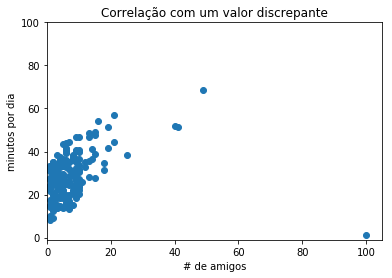

In [29]:
import matplotlib.pyplot as plt

# Gráfico com outliers
plt.scatter(num_friends, daily_minutes)
plt.axis([0,105,-1,100])
plt.title("Correlação com um valor discrepante")
plt.xlabel("# de amigos")
plt.ylabel("minutos por dia")

plt.show()

In [31]:
# Removendo o outlier
outlier = num_friends.index(100) # índice do valor discrepante
num_friends_good = [x 
                    for i, x in enumerate(num_friends) 
                    if i != outlier]

daily_minutes_good = [x 
                    for i, x in enumerate(daily_minutes) 
                    if i != outlier]

correlation(num_friends_good, daily_minutes_good)

0.5736792115665573

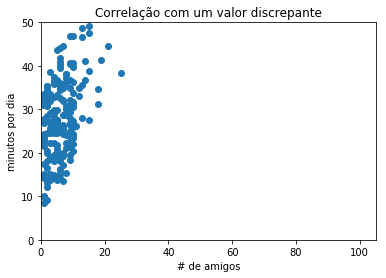

In [32]:
# Gráfico com outliers
plt.scatter(num_friends_good, daily_minutes_good)
plt.axis([0,105,0,50])
plt.title("Correlação com um valor discrepante")
plt.xlabel("# de amigos")
plt.ylabel("minutos por dia")

plt.show()

### Paradoxo de Simpson

* Correlações podem ser enganosas quando as variáveis de confusão são ignoradas.
* A forma como os dados estão agrupados podem distorcer a correlação entre as variáveis. 
* Para resolver esse problema é necessário conhecer bem os seus dados para que nenhum fator de confusão passe despercebido (Embora nem sempre seja possível)

### Alguns Outros Pontos de Atenção sobre Correlação

* Uma correlação de zero indica que não há uma relação linear entre as variáveis. 
* Entretanto, podem existir outros tipos de relação entre as variáveis, não necessariamente um linear.
